In [ ]:
import tensorflow as tf
from tensorflow.keras import layers , regularizers , Model


In [ ]:
class FundCNN(layers.Layer):
  def __init__(self,filters):
    super(FundCNN,self).__init__()
    self.layer1 = layers.Conv2D(filters[0], 3 , activation='relu', padding='same',name='1')
    self.layer2 = layers.Conv2D(filters[1], 3 , activation='relu', padding='same',name='2')
    self.layer3 = layers.Conv2D(filters[2], 3 , activation='relu', padding='same',name='3')
    self.layer4 = layers.Conv2D(filters[3], 3 , activation='relu', padding='same',name='4')
    self.layer5 = layers.Conv2D(filters[4], 3 , activation='relu', padding='same',name='5')
    self.layer6 = layers.Conv2D(filters[5], 3 , activation='relu', padding='same',name='6')
    self.layer7 = layers.Conv2D(filters[6], 3 , activation='relu', padding='same',name='7')
    self.layer8 = layers.Conv2D(filters[7], 3 , activation='relu', padding='same', strides=(2,2),name='8')
  
  def call(self, inputs):
    self.layer1_out= self.layer1(inputs)
    layer2_out= self.layer2(self.layer1_out)
    self.layer3_out= self.layer3(layer2_out)
    layer4_out= self.layer4(self.layer1_out+self.layer3_out)
    self.layer5_out= self.layer5(layer4_out)
    layer6_out= self.layer6(self.layer1_out+self.layer3_out+self.layer5_out)
    layer7_out= self.layer7(layer6_out)
    layer8_out= self.layer8(self.layer1_out+self.layer5_out+layer7_out)
    return layer8_out,self
  
  def get_layers(self):
    l= [self.layer1_out, self.layer3_out, self.layer5_out]
    return l
  

In [ ]:
class CNNBlock(layers.Layer):
  def __init__(self,filters,externals,is_pool,names):
    super(CNNBlock,self).__init__()
    self.layer1 = layers.Conv2D(filters[0], 3 , activation='relu', padding='same',name=names[0])
    self.layer2 = layers.Conv2D(filters[1], 3 , activation='relu', padding='same',name=names[1])
    self.layer3 = layers.Conv2D(filters[2], 3 , activation='relu', padding='same',name=names[2])
    self.layer4 = layers.Conv2D(filters[3], 3 , activation='relu', padding='same',name=names[3])
    self.layer5 = layers.Conv2D(filters[4], 3 , activation='relu', padding='same',name=names[4])
    if is_pool:
      self.layer6 = layers.AveragePooling2D((12,12),name=names[5]) 
    else:
      self.layer6 = layers.Conv2D(filters[5], 3 , activation='relu', padding='same',strides=(2,2),name=names[5])
    self.ext= externals
  
  def call(self,inputs, externals):
    layer1_out = self.layer1(inputs)
    layer2_out = self.layer2(layer1_out+externals)
    self.layer3_out = self.layer3(layer2_out)
    
    if 5 in self.ext:
      self.layer4_out = self.layer4(self.layer3_out+layer1_out+externals)
    else:
      self.layer4_out = self.layer4(self.layer3_out+layer1_out)
    
    self.layer5_out = self.layer5(self.layer4_out)

    layer6_out = self.layer6(self.layer3_out +self.layer5_out +layer1_out + externals)
    return layer6_out, self

  def get_layers(self):
    l= [self.layer3_out , self.layer5_out]
    return l

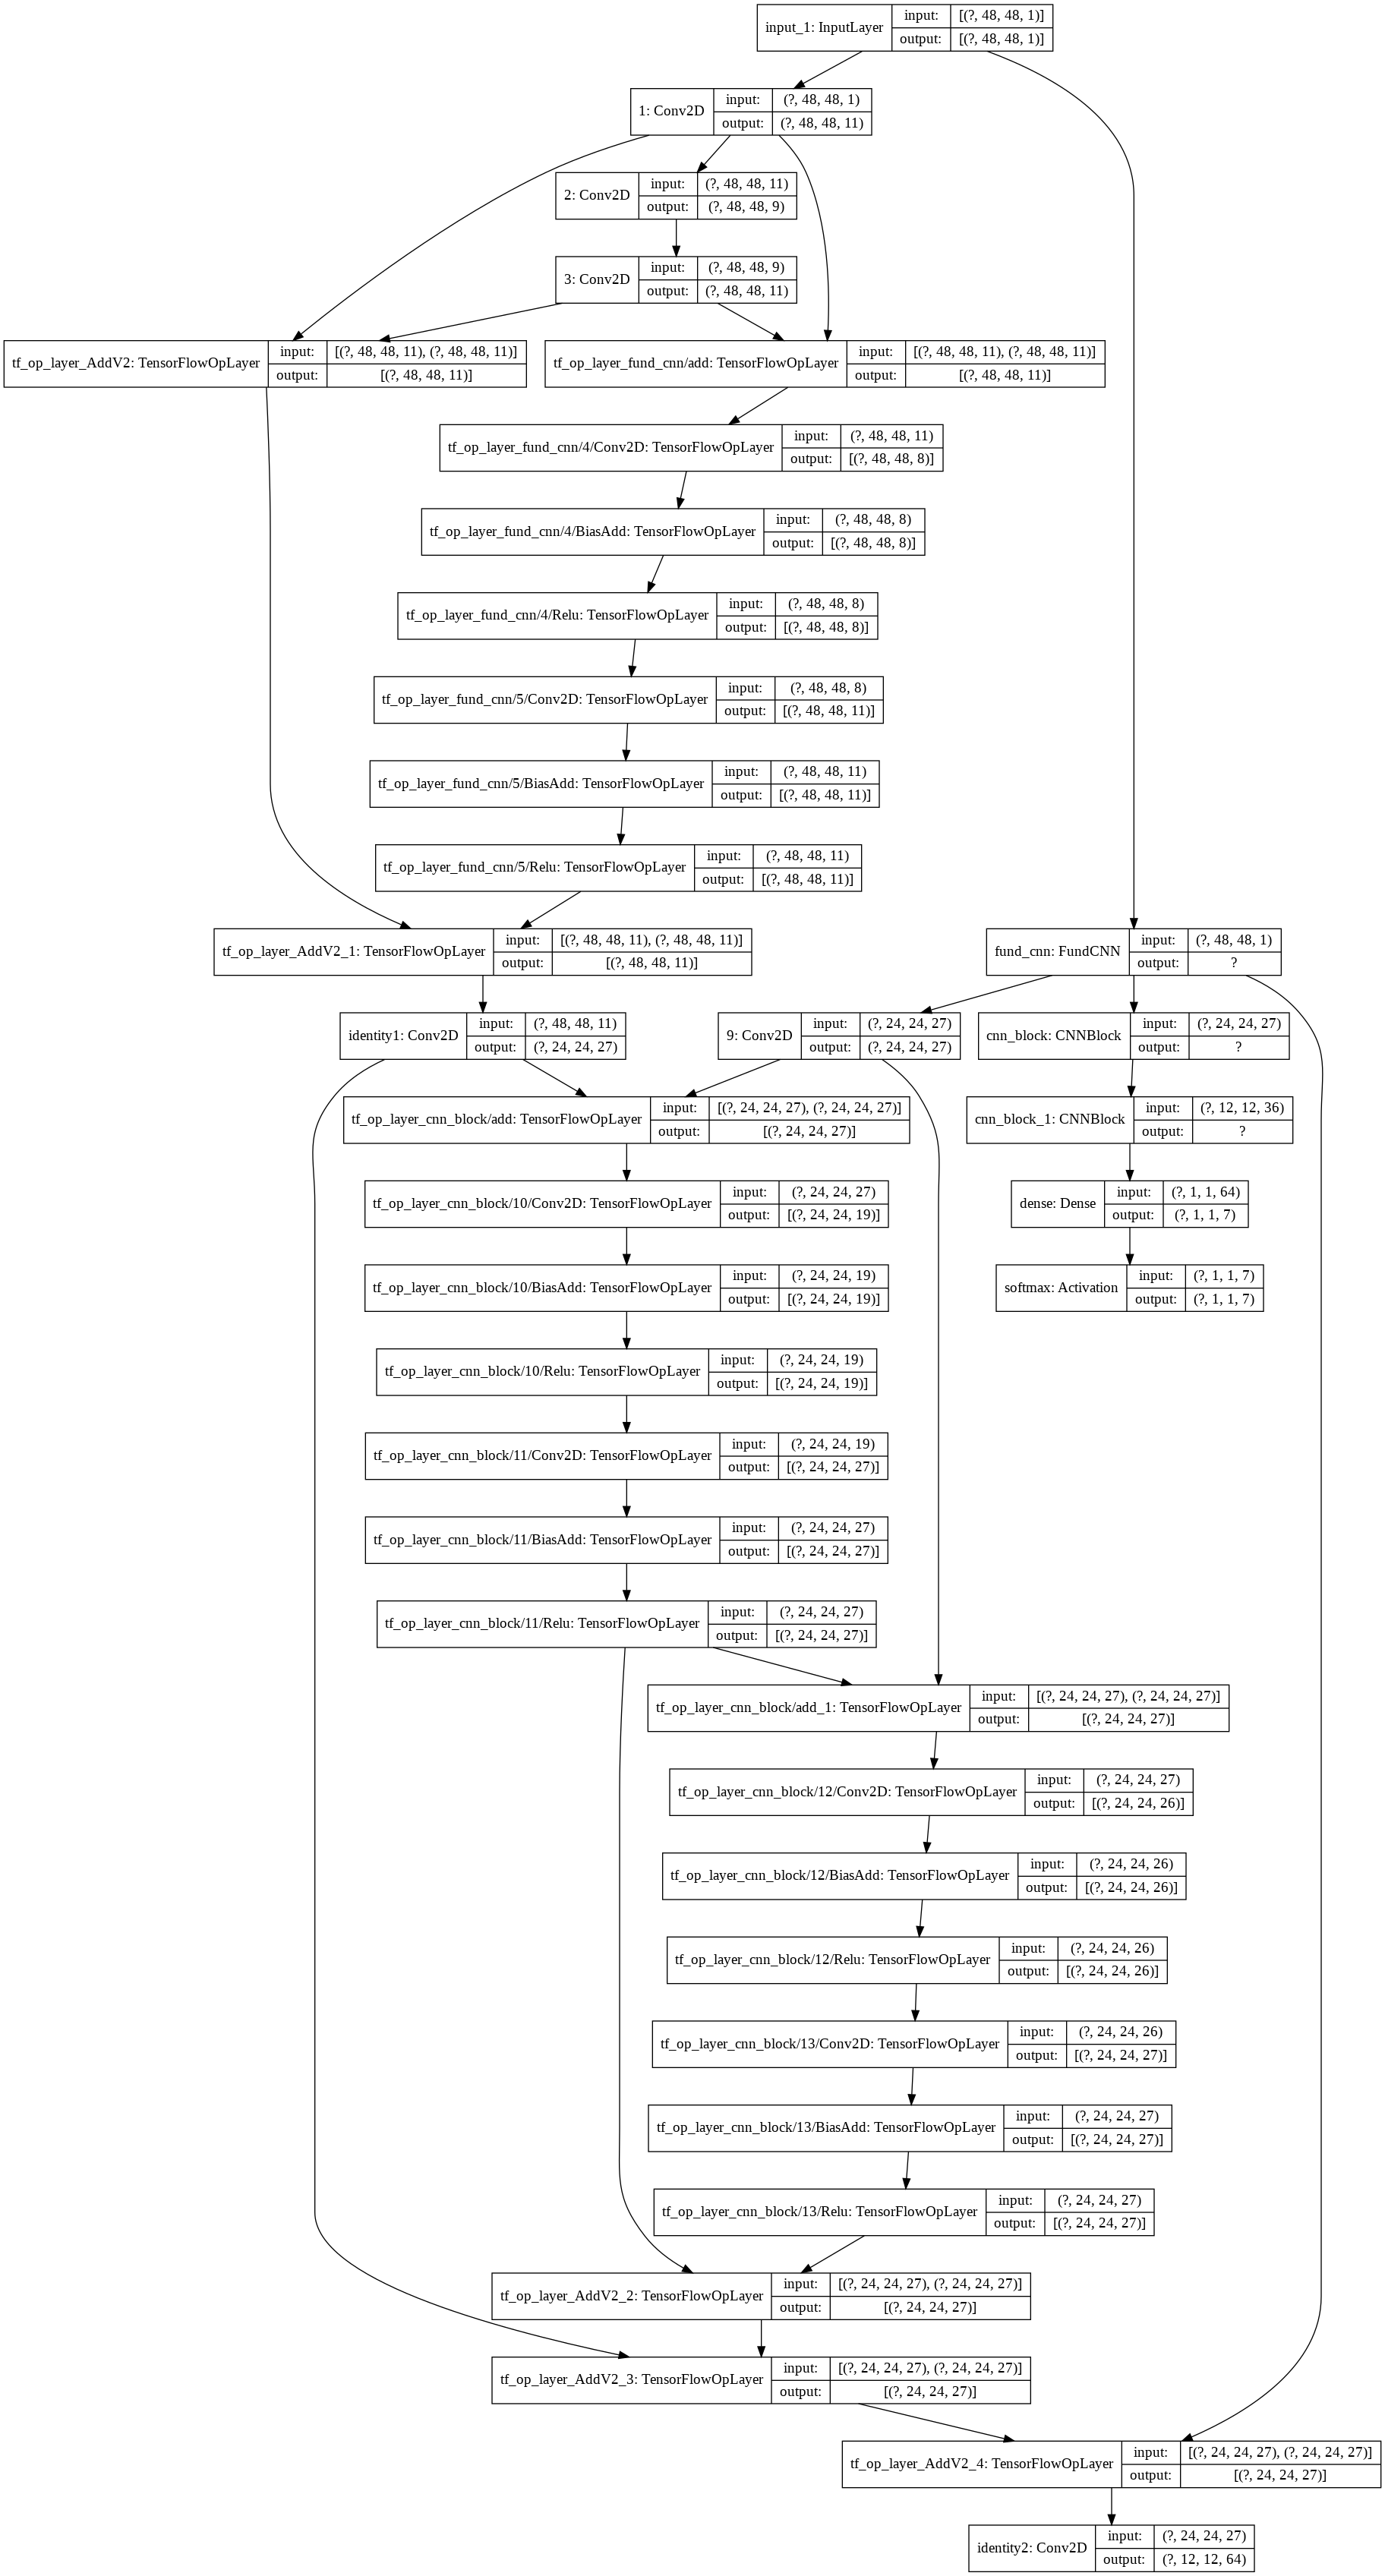

In [ ]:
tf.keras.backend.clear_session()
inputs = tf.keras.Input(shape=(48,48,1))
b0 ,b0_obj= FundCNN(filters=[11,9,11,8,11,7,11,27])(inputs)

b0_layers= b0_obj.get_layers()
identity1 = layers.Conv2D(27,1,strides=(2,2), name='identity1')(b0_layers[0]+b0_layers[1]+b0_layers[2])

################
b1 , b1_obj= CNNBlock([27,19,27,26,27,36],[2,6], False,['9','10','11','12','13','14'])(b0 , identity1)

b1_layers= b1_obj.get_layers()
identity2 = layers.Conv2D(64,1,strides=(2,2), name='identity2')(b1_layers[0] +b1_layers[1] +identity1 +b0)

################
b2 ,_= CNNBlock([64,39,64,24,64],[2,5,6], True,['15','16','17','18','19','20'])(b1 , identity2)

################
dense = layers.Dense(7)(b2)

output= layers.Activation('softmax', name='softmax')(dense)



model = Model(inputs= inputs , outputs= output)

# model.summary()
tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)




